In [1]:
import matplotlib.pyplot as plt
import context
from numlabs.lab2.lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np

******************************
context imported. Front of path:
/home/rbeutel/courses/numeric_students
back of path: /home/rbeutel/.ipython
******************************

through /home/rbeutel/courses/numeric_students/numlabs/lab2/context.py


In [2]:
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
    'midpoint': midpoint
}

In [3]:
def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------

    fun_choice: str
       name of finite difference approx from lab2_functions

    arg_dict: dict
       dictionary of arguments for lab2_functions

    Returns
    -------

    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp

In [4]:
Ta = 20
To = 30
tend = 10.0
theLambda = 0.8

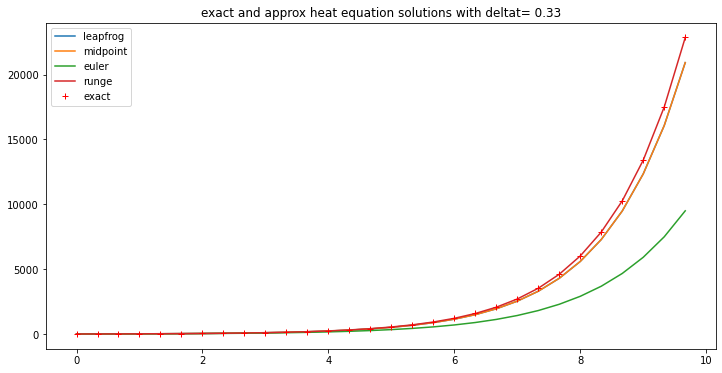

In [5]:
npts = 30

default_args = dict(Ta=Ta,
                    To=To,
                    tend=tend,
                    theLambda=theLambda,
                    npts=npts)

#
# start a plot to show all the functions
#
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
keep_curves = dict()
fun_list = ['leapfrog', 'midpoint', 'euler', 'runge']
#
# add a curve for each function in fun_list
#
for fun_choice in fun_list:
    approxTime, approxTemp = eval_fun(fun_choice, default_args)
    ax1.plot(approxTime, approxTemp, label=fun_choice)
    keep_curves[fun_choice] = (approxTime,approxTemp)
#
# now add the exact solution for comparison
#
exactTime1 = np.empty_like(approxTime)
exactTemp = np.empty_like(exactTime1)
for i in range(npts):
    exactTime1[i] = tend * i / npts
    exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime1[i])
ax1.plot(exactTime1, exactTemp, 'r+', label='exact')
deltat= tend / npts
title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
ax1.set(title=title)
ax1.legend(loc='best')

In [6]:
fun_choice = 'euler'
approxTemp = keep_curves[fun_choice][1]
difference1 = exactTemp - approxTemp

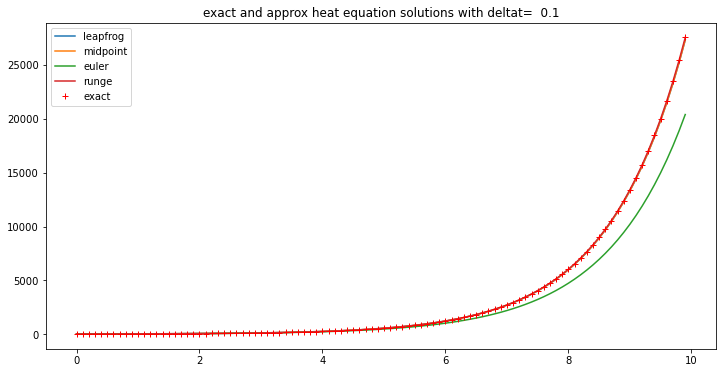

In [7]:
npts = 100

default_args = dict(Ta=Ta,
                    To=To,
                    tend=tend,
                    theLambda=theLambda,
                    npts=npts)

#
# start a plot to show all the functions
#
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
keep_curves = dict()
fun_list = ['leapfrog', 'midpoint', 'euler', 'runge']
#
# add a curve for each function in fun_list
#
for fun_choice in fun_list:
    approxTime, approxTemp = eval_fun(fun_choice, default_args)
    ax1.plot(approxTime, approxTemp, label=fun_choice)
    keep_curves[fun_choice] = (approxTime,approxTemp)
#
# now add the exact solution for comparison
#
exactTime2 = np.empty_like(approxTime)
exactTemp = np.empty_like(exactTime2)
for i in range(npts):
    exactTime2[i] = tend * i / npts
    exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime2[i])
ax1.plot(exactTime2, exactTemp, 'r+', label='exact')
deltat= tend / npts
title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
ax1.set(title=title)
ax1.legend(loc='best')

In [8]:
fun_choice = 'euler'
approxTemp = keep_curves[fun_choice][1]
difference2 = exactTemp - approxTemp

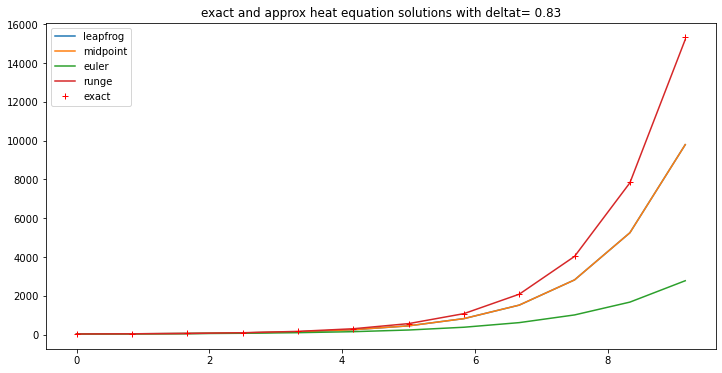

In [9]:
npts = 10

default_args = dict(Ta=Ta,
                    To=To,
                    tend=tend,
                    theLambda=theLambda,
                    npts=npts)

#
# start a plot to show all the functions
#
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
keep_curves = dict()
fun_list = ['leapfrog', 'midpoint', 'euler', 'runge']
#
# add a curve for each function in fun_list
#
for fun_choice in fun_list:
    approxTime, approxTemp = eval_fun(fun_choice, default_args)
    ax1.plot(approxTime, approxTemp, label=fun_choice)
    keep_curves[fun_choice] = (approxTime,approxTemp)
#
# now add the exact solution for comparison
#
exactTime3 = np.empty_like(approxTime)
exactTemp = np.empty_like(exactTime3)
for i in range(npts):
    exactTime3[i] = tend * i / npts
    exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime3[i])
ax1.plot(exactTime3, exactTemp, 'r+', label='exact')
deltat= tend / npts
title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
ax1.set(title=title)
ax1.legend(loc='best')

In [10]:
fun_choice = 'euler'
approxTemp = keep_curves[fun_choice][1]
difference3 = exactTemp - approxTemp

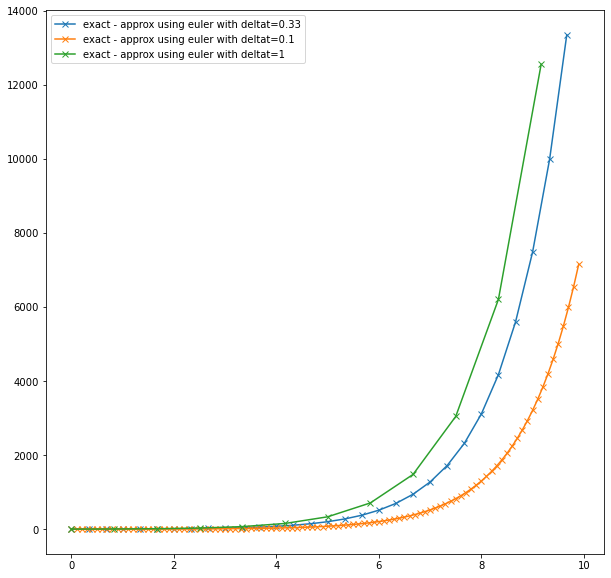

In [11]:
fig2, ax2 = plt.subplots(1, 1,figsize=(10,10))
ax2.plot(exactTime1, difference1, marker = 'x',label=f"exact - approx using {fun_choice} with deltat=0.33")
ax2.plot(exactTime2, difference2, marker = 'x',label=f"exact - approx using {fun_choice} with deltat=0.1")
ax2.plot(exactTime3, difference3, marker = 'x',label=f"exact - approx using {fun_choice} with deltat=1")
ax2.legend()
plt.show()

### Question a
In this example, the 4th order Runge-Kutta scheme os always the most accurate, followed by the 2nd order midpoint scheme, followed by the 1st order forward difference scheme. Thus, it appears as if the higher order the scheme the more accurate the approviamtion is.<br>

I tested number of steps between 8 and 1000 (10, 30, and 100 are shown in my submission) and in any of the tested cases the accuracy of the approximation increased with the increase in steps. At number of steps approching 100 difficult to discern the difference between the Runge-Kutta and midpoint scheme and at steps approching 1000 is was difficult to discren the difference between all three scehmes. 

### Question b
The local error is equal to the difference between the exact solution and the approximate solution as each discreate point if the approximate soltuion at the previous point is chosen as the initial condition of the exact solution. The local error in this case is not constant, ans thus must be calcualted at every step. The local error from the graph by taking the difference between the approximate and exact value at every step and subtracting the difference from the step before, thus the contribution to the difference at every step (aka the local error is found). <br>

In the case of the approximate forward difference solution with a delta t of 0.33 the local error is:

In [28]:
local1 = [difference1[i+1]-difference1[i] for i in range(len(difference1)-1)]

The global error is equal to the difference between the approximate solution and the exact solution at the final timestep.<br>

In the case of the approximate forward difference solution with a delta t of 0.33 the global error is:

In [29]:
difference1[-1]

13343.275779752186

as a check on the previous method, the global error should also be equal to the sum of of the local errors

In [30]:
sum(local1)

13343.275779752186

### Question c
Assuming that the constant 'c' should not change significantly between approximations with different timesteps the constant can be calcuated for various orders, 'p', until constants of the same order of magnitude are found for different step sizes. Acording to this trial-and-error below, this order of the system in question is 2. Assuming that the the local error is approximately constant, the global error is one order of delta t worse than the local error, and is thus equal to 1. <br>

The local error between schemes is significantly different. This makes sense according to my assumption in calculating the order, as the local error should be proportional to square root of the the timestep. Since the timesteps size between approximaitons is different so should be the local error. Unsurprisingly, the global error is also very different between schemes as it is realted to the local error. The global error is the sum lf the local errors at every point so the less accurate schemes, those with larger timesteps, have larger global errors. 

In [16]:
p = 2

In [27]:
print('the local error= '+str(difference1[1])+'\nthe timestep= '+str(exactTime1[1])+'\nthe global error='+str(difference1[-1]))

the local error= 0.3893850539828563
the timestep= 0.3333333333333333
the global error=13343.275779752186


In [32]:
print('c = '+str(difference1[1]/(exactTime1[1]**p)))

c = 3.5044654858457065


In [29]:
print('the local error= '+str(difference2[1])+'\nthe timestep= '+str(exactTime2[1])+'\nthe global error='+str(difference2[-1]))

the local error= 0.032870676749585215
the timestep= 0.1
the global error=7149.550676362367


In [34]:
print('c = '+str(difference2[1]/(exactTime2[1]**p)))

c = 3.287067674958521


In [30]:
print('the local error= '+str(difference3[1])+'\nthe timestep= '+str(exactTime3[1])+'\nthe global error='+str(difference3[-1]))

the local error= 4.255409284924681
the timestep= 1.0
the global error=11410.714740264179


In [35]:
print('c = '+str(difference3[1]/(exactTime3[1]**p)))

c = 4.255409284924681


In [36]:
p=1

In [39]:
test = [local1[i+1]/(local1[i]**p) for i in range(len(local1)-1)]
avgdif = [test[i+1]-test[i] for i in range(len(test)-1)]
sum(avgdif)/len(avgdif)

-0.008972673703475629

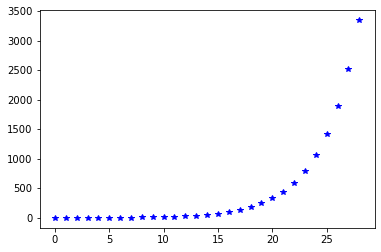

In [41]:
plt.plot(local1,'b*')

In [22]:
c = 1
p=2

In [24]:
len(difference1)

30

In [39]:
test = np.zeros(len(difference1))
for i in range(len(difference1)-1):
    test[i+1] = test[i] + 3.5*0.33**1

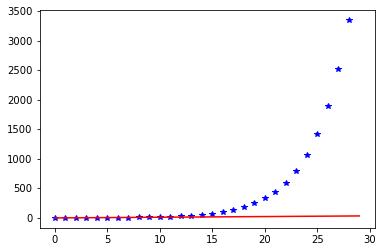

In [40]:
plt.plot(local1,'b*')
plt.plot(test,'r-')

In [41]:
test

array([ 0.   ,  1.155,  2.31 ,  3.465,  4.62 ,  5.775,  6.93 ,  8.085,
        9.24 , 10.395, 11.55 , 12.705, 13.86 , 15.015, 16.17 , 17.325,
       18.48 , 19.635, 20.79 , 21.945, 23.1  , 24.255, 25.41 , 26.565,
       27.72 , 28.875, 30.03 , 31.185, 32.34 , 33.495])